# Retail Sales Prediction 

## Project Summary

This is the capstone project for Advanced Data Science With IBM specialization on Coursera (https://www.coursera.org/learn/advanced-data-science-capstone/home/welcome).

This project demonstrates the technical skills gained in data science and machine learning technologies. This project uses:
* Python 3.6+
* Jupyter notebook environment
* Libraries: 
  * Numerical - numpy, pandas
  * Visualization - matplotlib, seaborn
  * ML - Scikit-Learn
  * NN - Keras, Tensorflow


### Problem Statement
A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Data Source
https://datahack.analyticsvidhya.com/contest/black-friday/

## Initial Data Exploration

### Read data
Read the data from input csv file

In [1]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('./BFS/Dataset/train.csv')
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Getting familiar with data
Explore the data in the dataframe to identify cleanup and transformation needed later

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [3]:
# Exclude User_ID from describe
train_df.iloc[:,1:].describe(include='all')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [4]:
col_list = ["Gender", 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for col in col_list:
    print(f'{col} -> {train_df[col].unique()}')

Gender -> ['F' 'M']
Age -> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation -> [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category -> ['A' 'C' 'B']
Stay_In_Current_City_Years -> ['2' '4+' '3' '1' '0']
Marital_Status -> [0 1]


In [5]:
train_df.corr()  # will need to convert object columns to numeric to get them in correlation matrix

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [6]:
# Explore 

# top 10 customers - most number of purchases, most $ purchases
top_users_1 = train_df[['User_ID', 'Product_ID']].groupby('User_ID', as_index=False).count().nlargest(10, 'Product_ID')
top_users_2 = train_df[['User_ID', 'Purchase']].groupby('User_ID', as_index=False).mean().nlargest(10, 'Purchase')
top_users_1, top_users_2

top_users = (train_df[['User_ID', 'Purchase']]
            .groupby('User_ID')
            .agg(['count', 'mean'])
            .rename(columns={'count':'Num_Purchases', 'mean':'Avg_Purchase_Amt'}))
top_users.columns = top_users.columns.droplevel(0)
pd.concat([top_users.nlargest(10, 'Num_Purchases'), top_users.nlargest(10, 'Avg_Purchase_Amt')])

,Num_Purchases,Avg_Purchase_Amt
User_ID,,
1001680,1026,8479.138402
1004277,979,10762.930541
1001941,898,7591.863029
1001181,862,7410.627610
1000889,823,6682.712029
1003618,767,7773.157757
1001150,752,6288.473404
1001015,740,8799.072973
1005795,729,7495.932785


In [7]:
# top 5 products

top_products = (train_df[['Product_ID', 'Purchase']]
            .groupby('Product_ID')
            .agg(['count', 'mean'])
            .rename(columns={'count':'Num_Buyers', 'mean':'Avg_Purchase_Amt'}))
top_products.columns = top_products.columns.droplevel(0)

# products that don't end in 42 have very low purchase amount
# train_df[~train_df['Product_ID'].str.endswith('42')]['Purchase'].mean()

pd.concat([top_products.nlargest(10, 'Num_Buyers'), top_products.nlargest(10, 'Avg_Purchase_Amt')])

,Num_Buyers,Avg_Purchase_Amt
Product_ID,,
P00265242,1880,7534.848404
P00025442,1615,17334.468111
P00110742,1612,16577.114764
P00112142,1562,15503.204866
P00057642,1470,15716.176871
P00184942,1440,16899.227083
P00046742,1438,14709.931850
P00058042,1422,8615.073136
P00059442,1406,17310.343528


In [8]:
# Gender
gender_summary = train_df[['Gender', 'Purchase']].groupby('Gender').agg(['count', 'mean'])
gender_summary

Purchase             
          count         mean
Gender                      
F        135809  8734.565765
M        414259  9437.526040

In [9]:
# Age demographic by number of purchases and $ purchases
age_summary = train_df[['Age', 'Purchase']].groupby('Age', as_index=False).agg(['count', 'mean'])
age_summary

Purchase             
         count         mean
Age                        
0-17     15102  8933.464640
18-25    99660  9169.663606
26-35   219587  9252.690633
36-45   110013  9331.350695
46-50    45701  9208.625697
51-55    38501  9534.808031
55+      21504  9336.280459

In [10]:
# top 5 occupations
occupation_summary = train_df[['Occupation', 'Purchase']].groupby('Occupation', as_index=False).agg(['count', 'mean'])
occupation_summary

Purchase             
              count         mean
Occupation                      
0             69638  9124.428588
1             47426  8953.193270
2             26588  8952.481683
3             17650  9178.593088
4             72308  9213.980251
5             12177  9333.149298
6             20355  9256.535691
7             59133  9425.728223
8              1546  9532.592497
9              6291  8637.743761
10            12930  8959.355375
11            11586  9213.845848
12            31179  9796.640239
13             7728  9306.351061
14            27309  9500.702772
15            12165  9778.891163
16            25371  9394.464349
17            40043  9821.478236
18             6622  9169.655844
19             8461  8710.627231
20            33562  8836.494905

In [11]:
# cities
cities_summary = train_df[['City_Category', 'Purchase']].groupby('City_Category').agg(['count', 'mean'])
cities_summary

Purchase             
                 count         mean
City_Category                      
A               147720  8911.939216
B               231173  9151.300563
C               171175  9719.920993

In [31]:
# Residential term
term_summary = train_df[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years').agg(['count', 'mean'])
term_summary.columns = term_summary.columns.droplevel(0)
term_summary

,count,mean
Stay_In_Current_City_Years,,
0,74398,9180.075123
1,193821,9250.145923
2,101838,9320.429810
3,95285,9286.904119
4+,84726,9275.598872


In [20]:
marital_summary = train_df[['Marital_Status', 'Purchase']].groupby('Marital_Status').agg(['count', 'mean'])
marital_summary.columns = marital_summary.columns.droplevel(0)
marital_summary

,count,mean
Marital_Status,,
0,324731,9265.907619
1,225337,9261.174574


## Visualizations

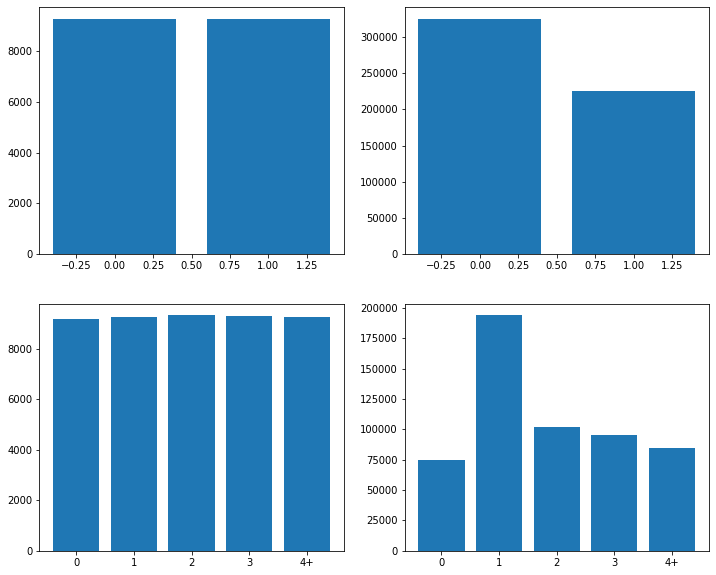

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig1 = plt.figure(figsize=(12,10))
ax1 = fig1.add_subplot(221)
ax2 = fig1.add_subplot(222)
ax1.bar(marital_summary.index.to_list(), marital_summary['mean'])
ax2.bar(marital_summary.index.to_list(), marital_summary['count'])
# plt.show()

# fig2 = plt.figure(figsize=(12,5))
ax3 = fig1.add_subplot(223)
ax4 = fig1.add_subplot(224)
ax3.bar(term_summary.index.to_list(), term_summary['mean'])
ax4.bar(term_summary.index.to_list(), term_summary['count'])
plt.show()

## Identifying data issues

## ETL

### Handle NULLs

### Transform column to categorical or use one-hot encoding

In [15]:
# useful links:

# https://www.datacamp.com/community/tutorials/categorical-data